### 🖥️분류 (Classification) 프로젝트 1
#### 🍕비만 수준 예측

#### ✏️feature

- Age: 나이
- Gender: 성별
- Height: 키(m)
- Weight: 체중(kg)
- CALC: 음주 빈도
- FAVC: 고칼로리 음식을 자주 섭취하는지 여부
- FCVC: 채소를 자주 섭취하는지 여부
- NCP: 일일 식사 횟수
- SCC: 하루 섭취 칼로리를 체크하는지 여부
- SMOKE: 흡연 여부
- CH20: 일일 물 섭취량(L)
- family_history_with_overweight: 가족 구성원 중 과체중 유무
- FAF: 신체 활동을 얼마나 자주 하는지
- TUE: 전자기기 사용량(시간)
- CAEC: 간식 섭취 여부
- MTRANS: 주로 이용하는 교통수단

#### 🎈target

- NObeyesdad: 비만 수준(Insufficient Weight(저체중), Normal Weight(정상 체중), Overweight Level I(과체중 1단계), Overweight Level II(과체중 2단계), Obesity Type I(비만 1단계), Obesity Type II(비만 2단계), Obesity Type III(비만 3단계)

### 목차

1. 데이터 탐색 및 분포 시각화
2. 데이터 전처리 및 훈련/학습 데이터 분리
3. 모델 훈련, 예측 및 평가
   - DTC
   - SVC
   - KNN
   - Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
4. 정확도 및 F1 score 비교 분석

#### 1. 데이터 탐색 및 분포 시각화

- 중복행, 결측치 검사
- 분포 시각화, 상관관계 확인 및 이상치 검사

- 데이터를 읽어옵니다.

In [1]:
import pandas as pd

o_df = pd.read_csv("./datasets/obesity_dataset.csv", low_memory=False)
o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- 데이터의 정보를 확인해봅니다.

In [2]:
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

- 중복행을 검사합니다.

In [3]:
o_df.duplicated().sum()

24

- 중복행을 제거합니다.

In [4]:
o_df.drop_duplicates(inplace=True)
o_df.duplicated().sum()

0

- 결측치를 검사합니다.

In [5]:
o_df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- 히스토그램을 통해 수치형 데이터를 가진 각 feature별 분포를 확인해봅니다.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

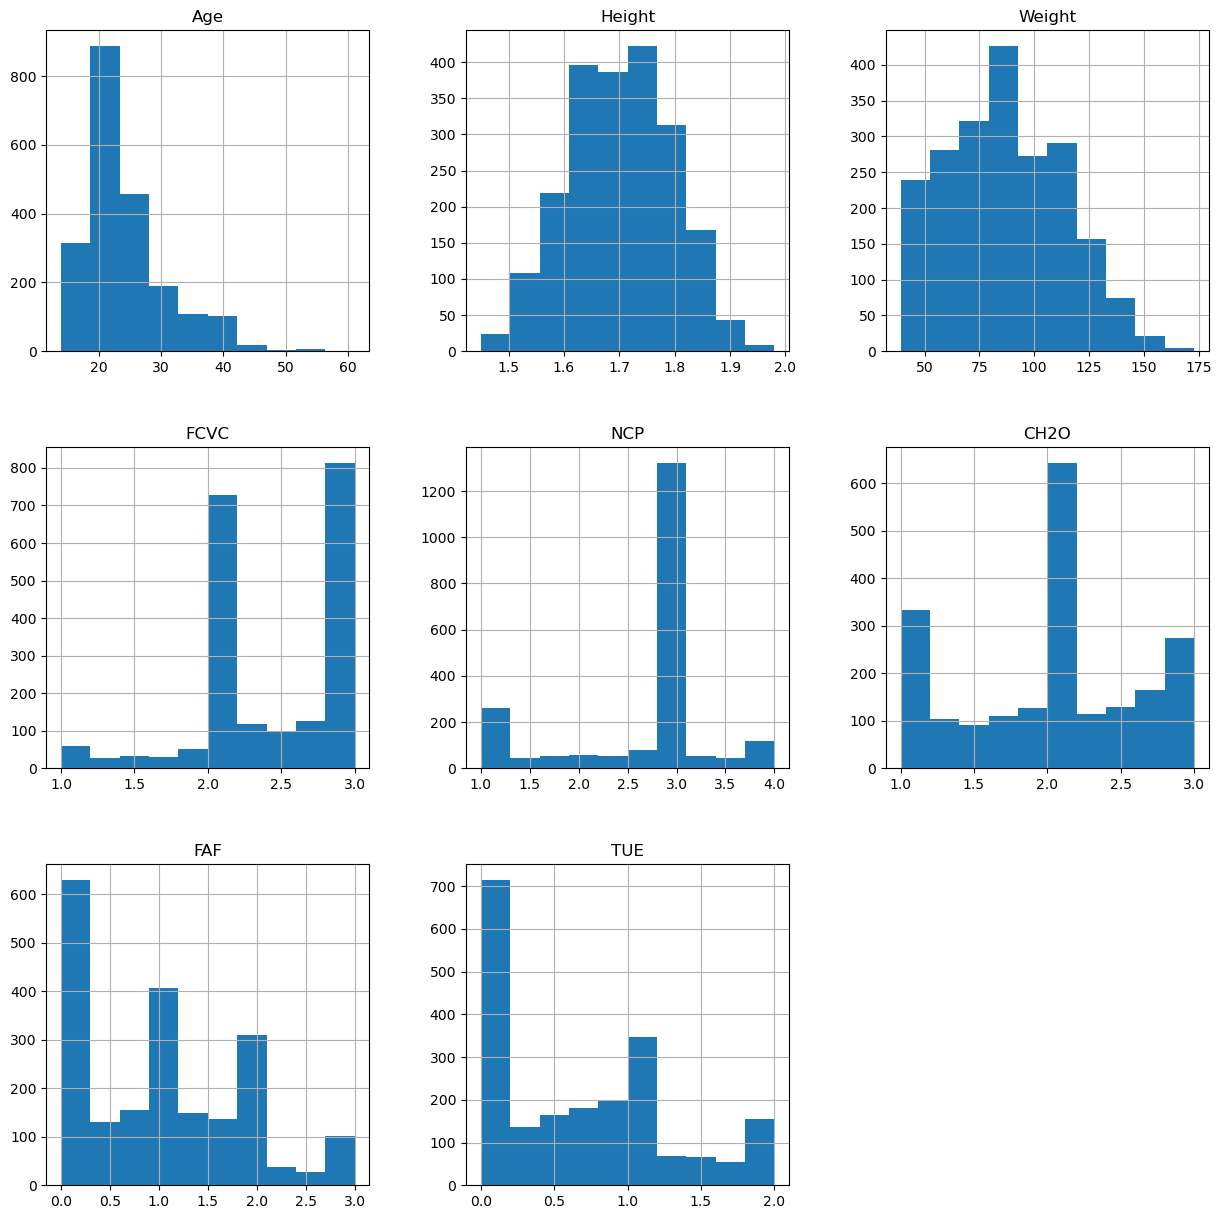

In [6]:
o_df.hist(figsize=(15, 15))

#### 2. 데이터 전처리 및 훈련/학습 데이터 분리

- NObeyesdad 컬럼의 이름을 target으로 변경합니다.
- target에 레이블 인코딩을 적용합니다.
- 마찬가지로 범주형 데이터를 가진 feature들에 대하여 레이블 인코딩을 진행합니다.
- target과의 상관관계를 확인합니다.
- train_test_split()을 통해 훈련 및 학습 데이터를 분리합니다.
- 훈련 데이터에서 target의 분포를 확인하여 필요 시 under/oversampling을 진행합니다.

- 먼저 원본 데이터 프레임을 복사하여 전처리를 진행합니다.

In [7]:
pre_o_df = o_df.copy()
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- target 컬럼의 이름을 변경합니다.

In [8]:
pre_o_df = pre_o_df.rename(columns={'NObeyesdad': 'target'})
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- target 에 레이블 인코딩을 적용합니다.

In [9]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(pre_o_df['target'])
pre_o_df['target'] = targets
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,1
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,1
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,5
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,4
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,4
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,4
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,4


In [10]:
print(target_encoder.classes_)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


- 마찬가지로 범주형 데이터를 가진 feature에 대하여 레이블 인코딩을 진행합니다.

In [11]:
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
encoders = dict()

for column in categorical_columns:
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(pre_o_df[column])
    pre_o_df[column] = encoded_column
    encoders[column] = encoder

pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [12]:
for column, encoder in encoders.items():
    print(f'{column}: {encoder.classes_}')

Gender: ['Female' 'Male']
CALC: ['Always' 'Frequently' 'Sometimes' 'no']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['no' 'yes']
CAEC: ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


- target과의 상관관계를 확인합니다.

In [13]:
corr = pre_o_df.corr()
corr

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
Age,1.000000,0.050641,-0.031748,0.198160,-0.045565,0.063895,0.013572,-0.055823,-0.117959,0.091261,-0.044058,0.200379,-0.148202,-0.302927,0.092097,-0.601476,0.238308
Gender,0.050641,1.000000,0.626748,0.163176,0.010574,0.061220,-0.271575,0.077863,-0.102435,0.045501,0.095129,0.113492,0.189471,0.022356,0.074564,-0.139044,0.014699
Height,-0.031748,0.626748,1.000000,0.457468,-0.135756,0.180694,-0.040363,0.227806,-0.137078,0.054326,0.220487,0.232258,0.293584,0.041808,0.058001,-0.068258,0.038700
Weight,0.198160,0.163176,0.457468,1.000000,-0.211351,0.274655,0.216574,0.092149,-0.205409,0.024369,0.203823,0.492969,-0.056490,-0.079351,0.300271,0.009836,0.388802
CALC,-0.045565,0.010574,-0.135756,-0.211351,1.000000,-0.087661,-0.063132,-0.082985,-0.004175,-0.083181,-0.085460,0.028403,0.086825,0.041830,-0.039502,-0.009828,-0.132821
FAVC,0.063895,0.061220,0.180694,0.274655,-0.087661,1.000000,-0.025419,-0.006398,-0.191277,-0.050713,0.002993,0.214329,-0.111184,0.071505,0.147921,-0.069422,0.041023
FCVC,0.013572,-0.271575,-0.040363,0.216574,-0.063132,-0.025419,1.000000,0.034885,0.071179,0.013716,0.081332,0.033199,0.022003,-0.104128,-0.038565,0.069012,0.025728
NCP,-0.055823,0.077863,0.227806,0.092149,-0.082985,-0.006398,0.034885,1.000000,-0.020461,0.005009,0.075335,0.028411,0.127816,0.015693,-0.072316,-0.043648,-0.088235
SCC,-0.117959,-0.102435,-0.137078,-0.205409,-0.004175,-0.191277,0.071179,-0.020461,1.000000,0.047384,0.009325,-0.193947,0.073768,-0.012875,-0.109393,0.044381,-0.050936
SMOKE,0.091261,0.045501,0.054326,0.024369,-0.083181,-0.050713,0.013716,0.005009,0.047384,1.000000,-0.031642,0.014885,0.010811,0.016491,-0.054960,-0.009995,-0.023341


In [14]:
corr['target'].sort_values(ascending=False)[1:]

Weight                            0.388802
family_history_with_overweight    0.330391
CAEC                              0.314510
Age                               0.238308
CH2O                              0.092616
FAVC                              0.041023
Height                            0.038700
FCVC                              0.025728
Gender                            0.014699
SMOKE                            -0.023341
MTRANS                           -0.047784
SCC                              -0.050936
TUE                              -0.064876
NCP                              -0.088235
CALC                             -0.132821
FAF                              -0.135192
Name: target, dtype: float64

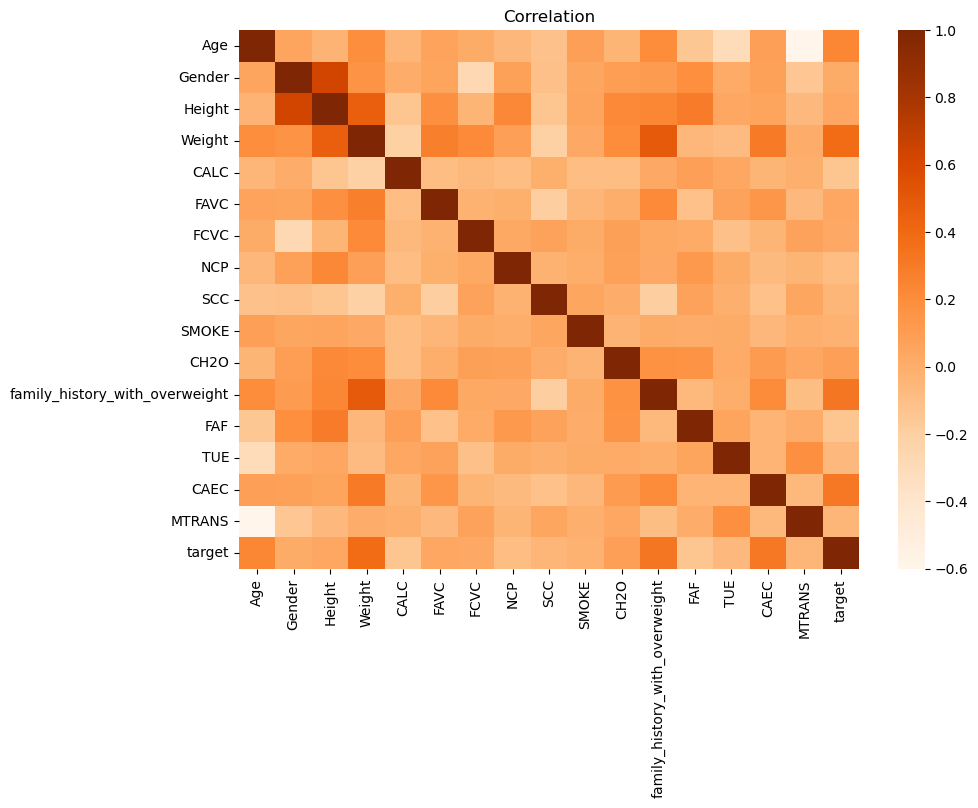

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')
plt.show()

- 나이, 체중, 가족 중 과체중 여부, 간식 섭취 여부 등이 target과 양의 상관관계를 나타내고 있음을 알 수 있습니다.
- 또한 가족 중 과체중 여부와 체중 feature가 서로 양의 상관관계를 가지며, 간식 섭취 여부와 체중 또한 양의 상관관계를 보입니다.

- 히스토그램으로 분포를 다시 확인해봅니다.